## Preliminary

Download and setup the finemapping from [http://www.christianbenner.com]. I used v1.4 and v1.3. The process for finemapping in versions 1.4 and 1.3 are virtually the same, however I saw inconsistent error messages in v1.4 and defaulted to v1.3. The two versions also produced different results

## Working Directories

In [ ]:
v14_cwd="~/Downloads/finemap_v1.4_MacOSX/"
v13_cwd="~/Downloads/finemap_v1.3.1_MacOSX/"

### Directories before running finemapping command

In [2]:
!tree $v14_cwd

/Users/tfabiha/Downloads/finemap_v1.4_MacOSX/
├── LICENSE
├── example
│   ├── data.config
│   ├── data.cred2
│   ├── data.cred3
│   ├── data.k
│   ├── data.ld
│   ├── data.snp
│   ├── data.z
│   └── master
├── finemap_v1.4_MacOSX
└── test
    ├── data.config
    ├── data.cred5
    ├── data.ld
    ├── data.snp
    ├── data.z
    └── master

2 directories, 16 files


In [3]:
!tree $v13_cwd

/Users/tfabiha/Downloads/finemap_v1.3.1_MacOSX/
├── LICENSE
├── example
│   ├── data.k
│   ├── data.ld
│   ├── data.z
│   └── master
├── finemap_v1.3.1_MacOSX
└── test
    ├── data.config
    ├── data.cred
    ├── data.ld
    ├── data.snp
    ├── data.z
    └── master

2 directories, 12 files


The example directory is already given to you. The test directory is where I stored the contents of region 15 67450330 67578374. The necessary input files are data.ld, data.z, and master.

The ld file must be without a header, with all correlations being between -1 and 1 inclusive. The z file must be sorted in the same order that the ld file is sorted in.

For the master file the file extensions in the header must exactly match the file extensions for the files themselves.

In [4]:
!(cd $v14_cwd && cat "example/master")

z;ld;snp;config;cred;log;k;n_samples
example/data.z;example/data.ld;example/data.snp;example/data.config;example/data.cred;example/data.log;example/data.k;5363


snp, config, cred, log, and k are all output files

In [5]:
!(cd $v14_cwd && "./finemap_v1.4_MacOSX" --sss --in-files "example/master")


|--------------------------------------|
| Welcome to FINEMAP v1.4              |
|                                      |
| (c) 2015-2020 University of Helsinki |
|                                      |
| Help :                               |
| - ./finemap --help                   |
| - www.finemap.me                     |
| - www.christianbenner.com            |
|                                      |
| Contact :                            |
| - christian.benner@helsinki.fi       |
| - matti.pirinen@helsinki.fi          |
|--------------------------------------|

--------
SETTINGS
--------
- dataset            : all
- corr-config        : 0.95
- n-causal-snps      : 5
- n-configs-top      : 50000
- n-conv-sss         : 100
- n-iter             : 100000
- n-threads          : 1
- prior-k0           : 0
- prior-std          : 0.05 
- prob-conv-sss-tol  : 0.001
- prob-cred-set      : 0.95

------------
FINE-MAPPING (1/1)
------------
- GWAS summary stats               : example/data

In [6]:
!(cd $v14_cwd && "./finemap_v1.4_MacOSX" --sss --in-files "test/master")


|--------------------------------------|
| Welcome to FINEMAP v1.4              |
|                                      |
| (c) 2015-2020 University of Helsinki |
|                                      |
| Help :                               |
| - ./finemap --help                   |
| - www.finemap.me                     |
| - www.christianbenner.com            |
|                                      |
| Contact :                            |
| - christian.benner@helsinki.fi       |
| - matti.pirinen@helsinki.fi          |
|--------------------------------------|

--------
SETTINGS
--------
- dataset            : all
- corr-config        : 0.95
- n-causal-snps      : 5
- n-configs-top      : 50000
- n-conv-sss         : 100
- n-iter             : 100000
- n-threads          : 1
- prior-k0           : 0
- prior-std          : 0.05 
- prob-conv-sss-tol  : 0.001
- prob-cred-set      : 0.95

------------
FINE-MAPPING (1/1)
------------
- GWAS summary stats               : test/data.z


In [7]:
!(cd $v13_cwd && "./finemap_v1.3.1_MacOSX" --sss --in-files "test/master")


|--------------------------------------|
| Welcome to FINEMAP v1.3.1            |
|                                      |
| (c) 2015-2018 University of Helsinki |
|                                      |
| Help :                               |
| - ./finemap --help                   |
| - www.finemap.me                     |
| - www.christianbenner.com            |
|                                      |
| Contact :                            |
| - christian.benner@helsinki.fi       |
| - matti.pirinen@helsinki.fi          |
|--------------------------------------|

--------
SETTINGS
--------
- dataset         : all
- corr-config     : 0.95
- n-causal-snps   : 5
- n-configs-top   : 50000
- n-convergence   : 1000
- n-iterations    : 100000
- prior-k0        : 0
- prior-std       : 0.05 
- prob-tol        : 0.001

------------
FINE-MAPPING (1/1)
------------
- GWAS summary stats               : test/data.z
- SNP correlations                 : test/data.ld
- Causal SNP stats           

## Results on SuSIE PIP

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def fail_if(b, msg):
    if b:
        raise ValueError(msg)

# will load an rds file into python
def load_rds(filename, types=None):
    import os
    import pandas as pd, numpy as np
    import rpy2.robjects as RO
    import rpy2.robjects.vectors as RV
    import rpy2.rinterface as RI
    from rpy2.robjects import numpy2ri
    numpy2ri.activate()
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    def load(data, types, rpy2_version=3):
        if types is not None and not isinstance(data, types):
            return np.array([])
        # FIXME: I'm not sure if I should keep two versions here
        # rpy2_version 2.9.X is more tedious but it handles BoolVector better
        # rpy2 version 3.0.1 converts bool to integer directly without dealing with
        # NA properly. It gives something like (0,1,-234235).
        # Possibly the best thing to do is to open an issue for it to the developers.
        if rpy2_version == 2:
            # below works for rpy2 version 2.9.X
            if isinstance(data, RI.RNULLType):
                res = None
            elif isinstance(data, RV.BoolVector):
                data = RO.r['as.integer'](data)
                res = np.array(data, dtype=int)
                # Handle c(NA, NA) situation
                if np.sum(np.logical_and(res != 0, res != 1)):
                    res = res.astype(float)
                    res[res < 0] = np.nan
                    res[res > 1] = np.nan
            elif isinstance(data, RV.FactorVector):
                data = RO.r['as.character'](data)
                res = np.array(data, dtype=str)
            elif isinstance(data, RV.IntVector):
                res = np.array(data, dtype=int)
            elif isinstance(data, RV.FloatVector):
                res = np.array(data, dtype=float)
            elif isinstance(data, RV.StrVector):
                res = np.array(data, dtype=str)
            elif isinstance(data, RV.DataFrame):
                res = pd.DataFrame(data)
            elif isinstance(data, RV.Matrix):
                res = np.matrix(data)
            elif isinstance(data, RV.Array):
                res = np.array(data)
            else:
                # I do not know what to do for this
                # But I do not want to throw an error either
                res = str(data)
        else:
            if isinstance(data, RI.NULLType):
                res = None
            else:
                res = data
        if isinstance(res, np.ndarray) and res.shape == (1, ):
            res = res[0]
        return res
    def load_dict(res, data, types):
        '''load data to res'''
        names = data.names if not isinstance(data.names, RI.NULLType) else [
            i + 1 for i in range(len(data))
        ]
        for name, value in zip(names, list(data)):
            if isinstance(value, RV.ListVector):
                res[name] = {}
                res[name] = load_dict(res[name], value, types)
            else:
                res[name] = load(value, types)
        return res
    #
    if not os.path.isfile(filename):
        raise IOError('Cannot find file ``{}``!'.format(filename))
    rds = RO.r['readRDS'](filename)
    if isinstance(rds, RV.ListVector):
        res = load_dict({}, rds, types)
    else:
        res = load(rds, types)
    return res

# get a unique list of the input sequence
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [10]:
rds_file = "15_67450330_67578374.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols_forbolt030720_ASTHMA.fastGWA.SuSiE_RSS.rds"
rd = load_rds(rds_file)

In [11]:
susie_csets_on_susie = dict()
all_cred_vars = []
normal_on_susie = []

try:
    if rd["sets"]["cs"] == None:
        print("no CS")
        raise ValueError("") 
    
    for cset in rd["sets"]["cs"].keys():
        x = []
        y = []
        
        if isinstance(rd["sets"]["cs"][cset], np.ndarray):
            for snp_ind in rd["sets"]["cs"][cset]:
                snp_ind = snp_ind.item() - 1
                x.append(rd["pos"][snp_ind])
                y.append(rd["pip"][snp_ind])
                all_cred_vars.append(rd["pos"][snp_ind])
        else:
            snp_ind = rd["sets"]["cs"][cset]
            snp_ind = snp_ind.item() - 1
            x.append(rd["pos"][snp_ind])
            y.append(rd["pip"][snp_ind])
            all_cred_vars.append(rd["pos"][snp_ind])            
        susie_csets_on_susie[cset] = [x, y]
    
    x = []
    y = []
    
    for snp_ind, pos in enumerate(rd["pos"]):
        if pos not in all_cred_vars:
            x.append(pos)
            y.append(rd["pip"][snp_ind])
    normal_on_susie.extend([x, y])
                
except:
    pass

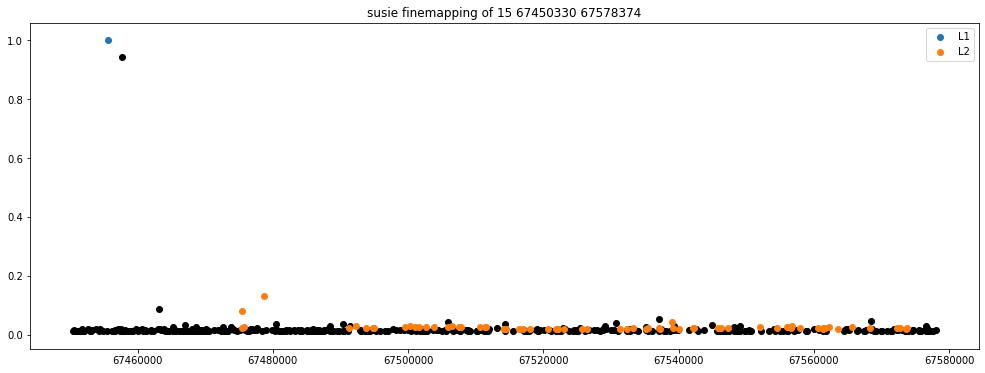

In [12]:
# susie

susie_on_susie = plt.figure(figsize=(17, 6))
plt.scatter(normal_on_susie[0], normal_on_susie[1], color="black")
for key in susie_csets_on_susie.keys():
    plt.scatter(susie_csets_on_susie[key][0], susie_csets_on_susie[key][1], label=key)
    
plt.legend(loc="upper right")
plt.ticklabel_format(style='plain', axis='x')
plt.title("susie finemapping of 15 67450330 67578374")
plt.show()

## Results on v1.4 PIP

In [13]:
snp_file = v14_cwd + "test/data.snp"
snp_v14 = pd.read_csv(snp_file, header=0, index_col=0, sep=" ")

In [14]:
snp_v14

,rsid,chromosome,position,allele1,allele2,maf,beta,se,z,prob,log10bf,mean,sd,mean_incl,sd_incl
index,,,,,,,,,,,,,,,
40,rs28360855,15,67458805,A,G,0.403701,0.007451,0.000871,8.55548,1.000000,12.48220,-1.171790,0.016137,-1.17179,0.016137
38,rs4562997,15,67458152,G,A,0.294039,0.011400,0.000936,12.17930,1.000000,12.48220,-1.171790,0.016137,-1.17179,0.016137
80,rs2278545,15,67466879,G,T,0.109891,-0.005916,0.001377,-4.29537,1.000000,12.48220,-1.171790,0.016137,-1.17179,0.016137
30,rs1065080,15,67457335,G,A,0.117874,-0.005660,0.001323,-4.27742,1.000000,12.48180,-1.171790,0.016137,-1.17179,0.016137
220,rs149079147,15,67495813,T,A,0.011177,-0.011417,0.004128,-2.76580,0.604036,2.66271,-0.703327,0.569540,-1.16438,0.013219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,rs7164786,15,67453042,G,A,0.297454,0.011290,0.000932,12.10980,0.000000,-inf,0.000000,0.000000,0.00000,0.000000
14,rs9920190,15,67452988,A,G,0.297478,0.011300,0.000932,12.12040,0.000000,-inf,0.000000,0.000000,0.00000,0.000000
11,rs770423929,15,67452003,TACTCCCTCCCTGTA,T,0.297367,0.011251,0.000933,12.05690,0.000000,-inf,0.000000,0.000000,0.00000,0.000000


In [15]:
cred_file = v14_cwd + "test/data.cred5"
results_14 = pd.read_csv(cred_file, header=5, index_col=0, sep=" ")

In [16]:
results_14 = results_14.transpose()

In [17]:
results_14

index,1,2
cred1,rs4562997,NaN
prob1,1,NaN
cred2,rs28360855,NaN
prob2,1,NaN
cred3,rs1065080,NaN
prob3,1,NaN
cred4,rs2278545,NaN
prob4,1,NaN
cred5,rs149079147,rs185919074
prob5,0.604036,0.395964


In [18]:
v14_csets_on_v14 = dict()
all_cred_vars = []
normal_on_v14 = []

for index, row in results_14.iterrows():
    if "cred" in index:
        x = []
        y = []
        
        for each in row:
            if isinstance(each, str):
                row = snp_v14[snp_v14.rsid == each]
                x.append(row["position"].item())
                y.append(row["prob"].item())
                all_cred_vars.append(row["position"].item())
        v14_csets_on_v14[index] = [x, y]
            
x = []
y = []

for snp_ind, row in snp_v14.iterrows():
    pos = row["position"]
    if pos not in all_cred_vars:
        x.append(pos)
        y.append(row["prob"])
normal_on_v14.extend([x, y])

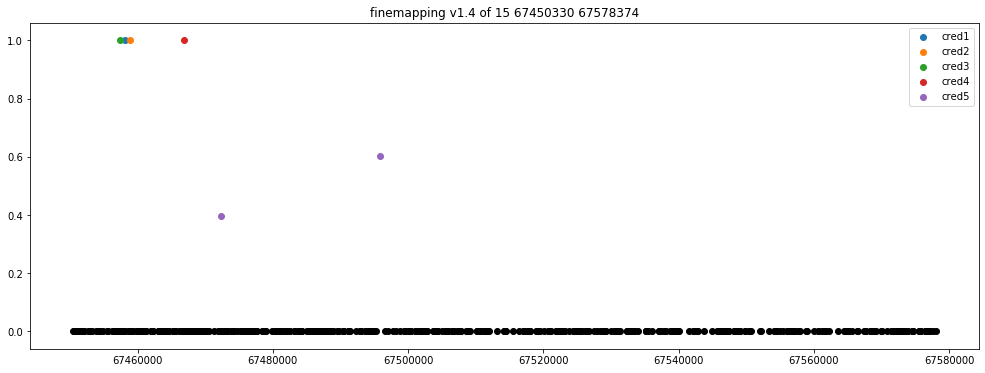

In [19]:
# v14

v14_on_v14 = plt.figure(figsize=(17, 6))
plt.scatter(normal_on_v14[0], normal_on_v14[1], color="black")
for key in v14_csets_on_v14.keys():
    plt.scatter(v14_csets_on_v14[key][0], v14_csets_on_v14[key][1], label=key)
    
plt.legend(loc="upper right")
plt.ticklabel_format(style='plain', axis='x')
plt.title("finemapping v1.4 of 15 67450330 67578374")
plt.show()

## Results on v1.3 PIP

In [20]:
snp_file = v13_cwd + "test/data.snp"
snp_v13 = pd.read_csv(snp_file, header=0, index_col=0, sep=" ")

In [21]:
snp_v13

,rsid,chromosome,position,allele1,allele2,maf,beta,se,z,prob,log10bf,group,corr_group,prob_group,log10bf_group,mean,sd,mean_incl,sd_incl
index,,,,,,,,,,,,,,,,,,,
38,rs4562997,15,67458152,G,A,0.294039,0.011400,0.000936,12.179300,1.000000,12.48300,38,1,1,12.483,2.252070,0.016515,2.252070,0.016515
40,rs28360855,15,67458805,A,G,0.403701,0.007451,0.000871,8.555480,1.000000,12.48300,40,1,1,12.483,2.232480,0.016497,2.232480,0.016497
80,rs2278545,15,67466879,G,T,0.109891,-0.005916,0.001377,-4.295370,1.000000,12.48300,80,1,1,12.483,-1.047430,0.013917,-1.047430,0.013917
30,rs1065080,15,67457335,G,A,0.117874,-0.005660,0.001323,-4.277420,1.000000,12.48290,30,1,1,12.483,-1.174370,0.016254,-1.174370,0.016254
119,rs185919074,15,67472317,G,A,0.012719,-0.000008,0.003873,-0.002135,0.545734,2.55897,119,1,1,12.483,-0.181243,0.165598,-0.332108,0.012056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,rs7173698,15,67450893,A,G,0.297463,0.011282,0.000932,12.101800,0.000000,-inf,3,1,1,12.483,0.000000,0.000000,0.000000,0.000000
5,rs7174445,15,67451215,C,G,0.297444,0.011291,0.000932,12.111300,0.000000,-inf,5,1,1,12.483,0.000000,0.000000,0.000000,0.000000
11,rs770423929,15,67452003,TACTCCCTCCCTGTA,T,0.297367,0.011251,0.000933,12.056900,0.000000,-inf,11,1,1,12.483,0.000000,0.000000,0.000000,0.000000


In [22]:
cred_file = v13_cwd + "test/data.cred"
results_13 = pd.read_csv(cred_file, header=0, index_col=0, sep=" ")

In [23]:
results_13 = results_13.transpose()

In [24]:
results_13

index,1,2
cred_set_rs1065080,rs1065080,NaN
prob_set_rs1065080,1,NaN
cred_set_rs4562997,rs4562997,NaN
prob_set_rs4562997,1,NaN
cred_set_rs28360855,rs28360855,NaN
prob_set_rs28360855,1,NaN
cred_set_rs2278545,rs2278545,NaN
prob_set_rs2278545,1,NaN
cred_set_rs185919074,rs185919074,rs149079147
prob_set_rs185919074,0.545734,0.454266


In [25]:
v13_csets_on_v13 = dict()
all_cred_vars = []
normal_on_v13 = []

for index, row in results_13.iterrows():
    if "cred" in index:
        x = []
        y = []
        
        for each in row:
            if isinstance(each, str):
                row = snp_v13[snp_v13.rsid == each]
                x.append(row["position"].item())
                y.append(row["prob"].item())
                all_cred_vars.append(row["position"].item())
        v13_csets_on_v13[index] = [x, y]
            
x = []
y = []

for snp_ind, row in snp_v14.iterrows():
    pos = row["position"]
    if pos not in all_cred_vars:
        x.append(pos)
        y.append(row["prob"])
normal_on_v13.extend([x, y])

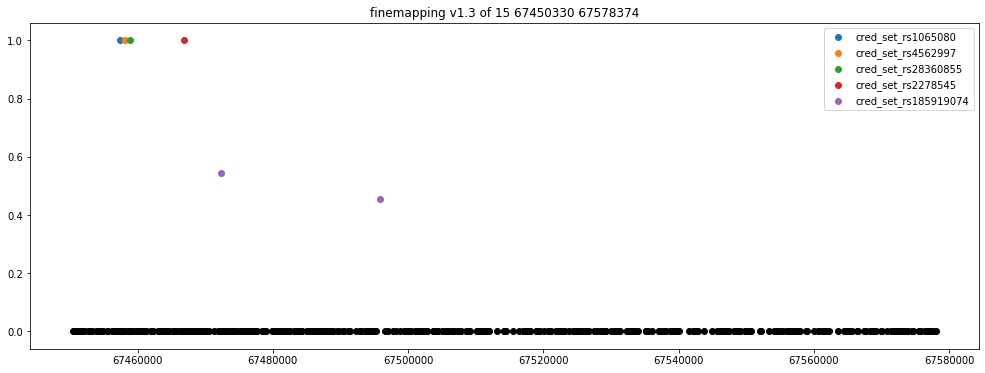

In [26]:
# v13

v13_on_v13 = plt.figure(figsize=(17, 6))
plt.scatter(normal_on_v13[0], normal_on_v13[1], color="black")
for key in v13_csets_on_v13.keys():
    plt.scatter(v13_csets_on_v13[key][0], v13_csets_on_v13[key][1], label=key)
    
plt.legend(loc="upper right")
plt.ticklabel_format(style='plain', axis='x')
plt.title("finemapping v1.3 of 15 67450330 67578374")
plt.show()

## Comparison of Finemapping

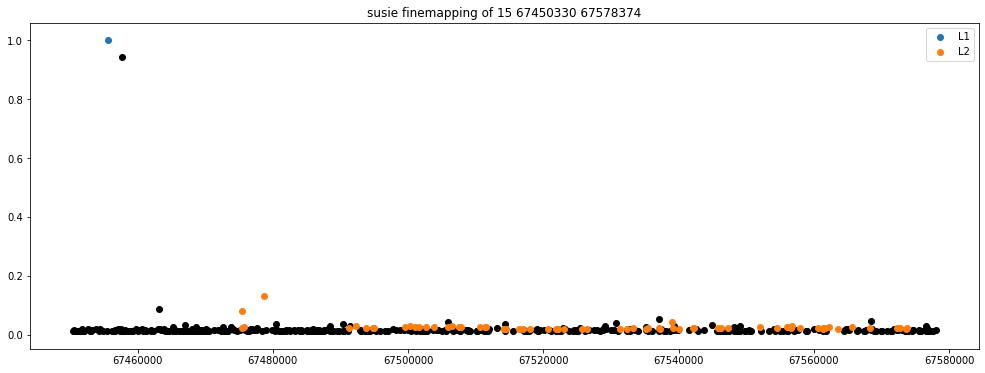

In [27]:
susie_on_susie

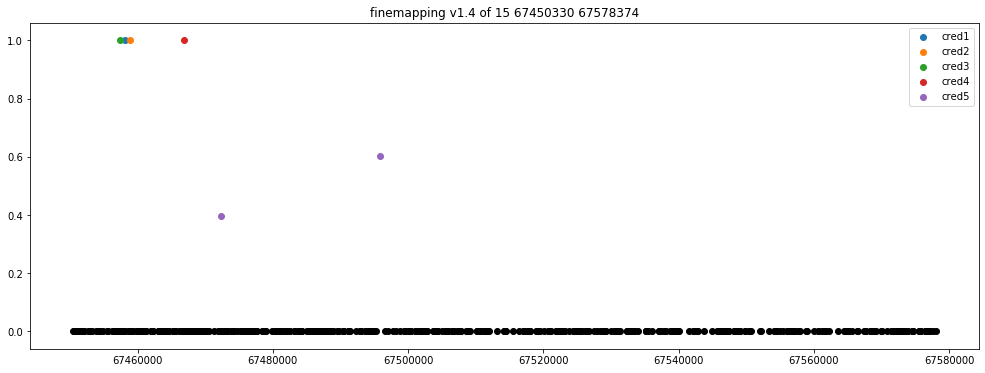

In [28]:
v14_on_v14

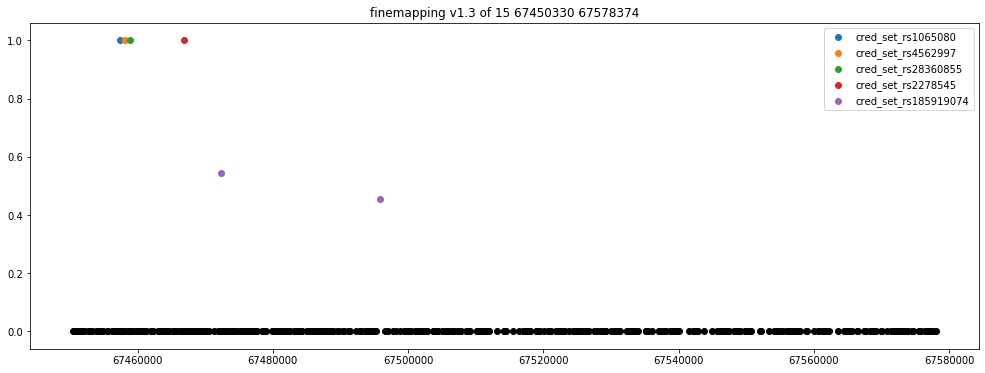

In [29]:
v13_on_v13

I initially thought that v1.3 and v1.4 produced very different results, but looking at the output here, they seem exactly the same. The major difference betwene v1.4 and v1.3 for this output is that the pip values for the fifth credible set are slightly different.

### Hudson Plot of SuSIE vs v1.4

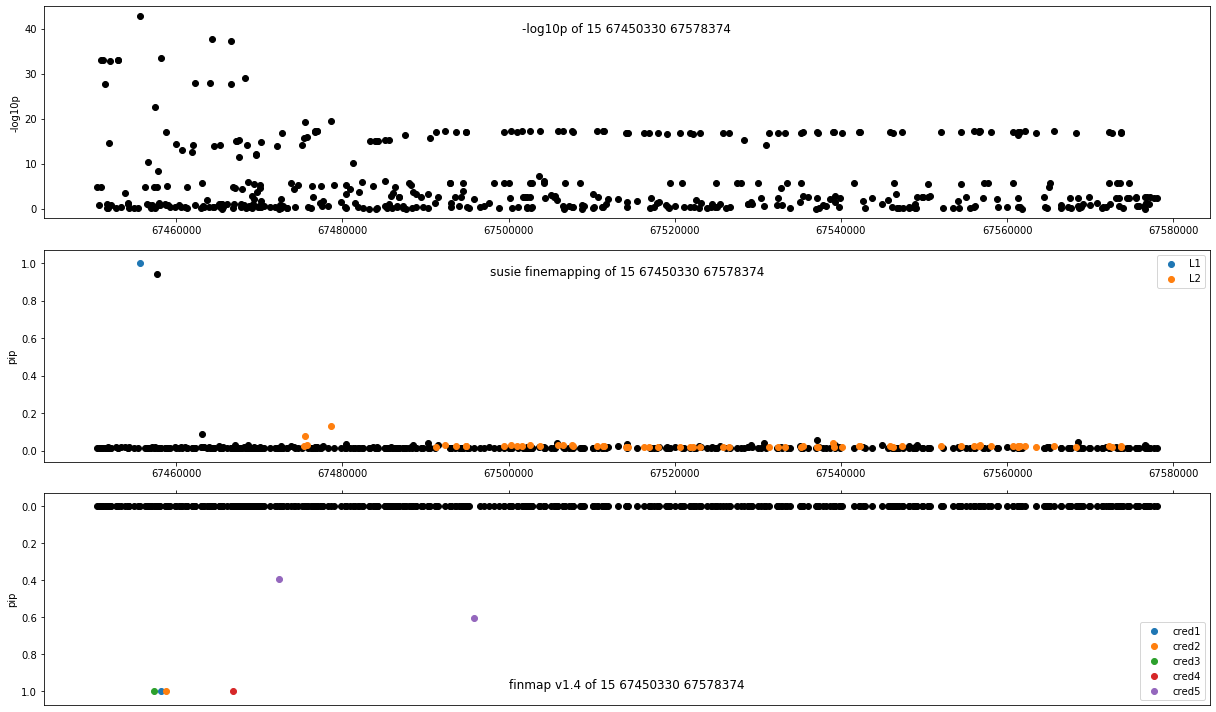

In [35]:
fig, axes = plt.subplots(nrows=3, figsize=(17, 10))

x = []
y = []
for snp_ind, pos in enumerate(rd["pos"]):
    x.append(pos)
    y.append(-np.log10(rd["p"][snp_ind]))
    
axes[0].scatter(x, y, color="black")
axes[0].set_title('-log10p of 15 67450330 67578374', x=0.5, y=0.85)

axes[1].scatter(normal_on_susie[0], normal_on_susie[1], color="black")
for key in susie_csets_on_susie.keys():
    axes[1].scatter(susie_csets_on_susie[key][0], susie_csets_on_susie[key][1], label=key)
axes[1].set_title('susie finemapping of 15 67450330 67578374', x=0.5, y=0.85)

axes[2].scatter(normal_on_v14[0], normal_on_v14[1], color="black")
for key in v14_csets_on_v14.keys():
    axes[2].scatter(v14_csets_on_v14[key][0], v14_csets_on_v14[key][1], label=key)
axes[2].set_title('finmap v1.4 of 15 67450330 67578374', x= 0.5, y=0.05)

axes[2].invert_yaxis()
axes[2].xaxis.tick_top()

axes[1].legend(loc="upper right")
axes[2].legend(loc="lower right")

axes[0].ticklabel_format(style='plain', axis='x')
axes[1].ticklabel_format(style='plain', axis='x')
axes[2].ticklabel_format(style='plain', axis='x')

axes[0].set_ylabel("-log10p")
axes[1].set_ylabel("pip")
axes[2].set_ylabel("pip")

axes[2].set_xticklabels(" ")

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

### Hudson Plot of SuSIE vs v1.3

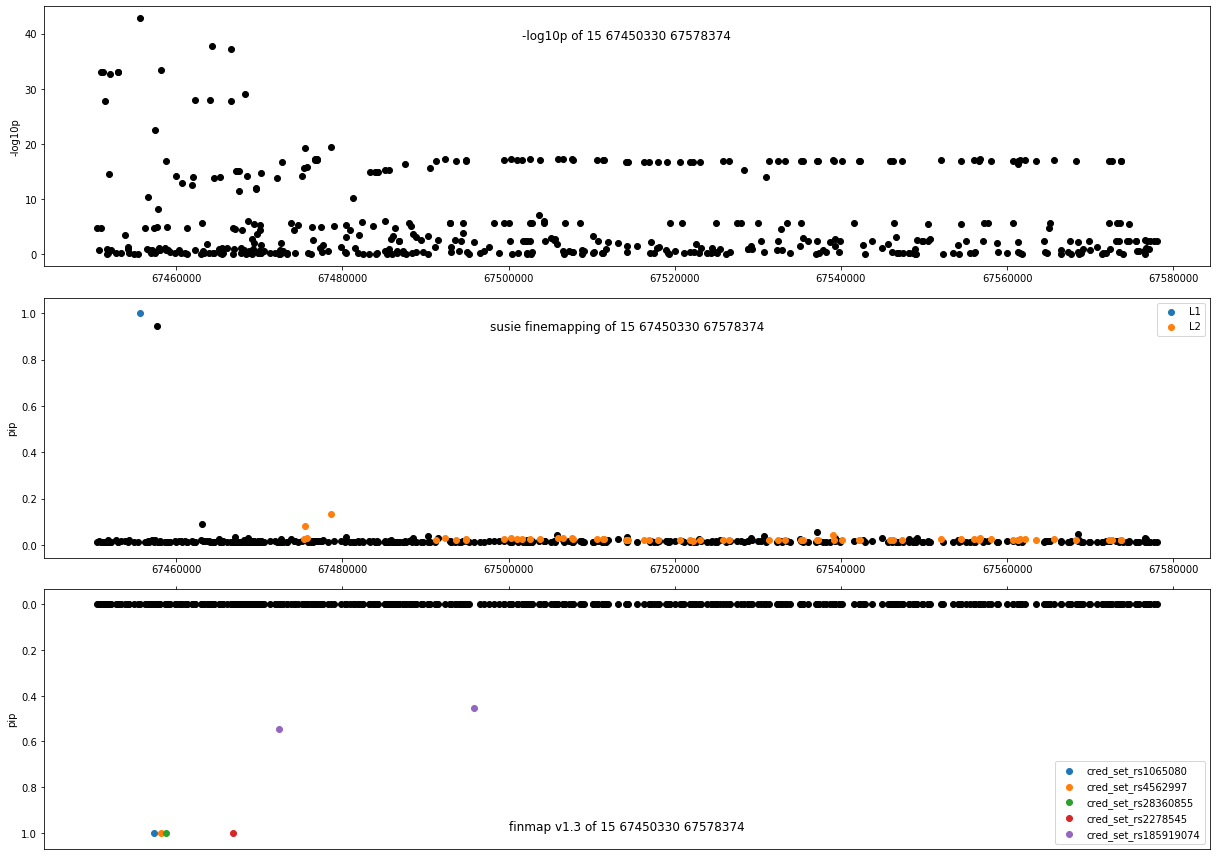

In [34]:
fig, axes = plt.subplots(nrows=3, figsize=(17, 12))

x = []
y = []
for snp_ind, pos in enumerate(rd["pos"]):
    x.append(pos)
    y.append(-np.log10(rd["p"][snp_ind]))
    
axes[0].scatter(x, y, color="black")
axes[0].set_title('-log10p of 15 67450330 67578374', x=0.5, y=0.85)

axes[1].scatter(normal_on_susie[0], normal_on_susie[1], color="black")
for key in susie_csets_on_susie.keys():
    axes[1].scatter(susie_csets_on_susie[key][0], susie_csets_on_susie[key][1], label=key)
axes[1].set_title('susie finemapping of 15 67450330 67578374', x=0.5, y=0.85)

axes[2].scatter(normal_on_v13[0], normal_on_v13[1], color="black")
for key in v13_csets_on_v13.keys():
    axes[2].scatter(v13_csets_on_v13[key][0], v13_csets_on_v13[key][1], label=key)
axes[2].set_title('finmap v1.3 of 15 67450330 67578374', x= 0.5, y=0.05)

axes[2].invert_yaxis()
axes[2].xaxis.tick_top()

axes[1].legend(loc="upper right")
axes[2].legend(loc="lower right")

axes[0].ticklabel_format(style='plain', axis='x')
axes[1].ticklabel_format(style='plain', axis='x')
axes[2].ticklabel_format(style='plain', axis='x')

axes[0].set_ylabel("-log10p")
axes[1].set_ylabel("pip")
axes[2].set_ylabel("pip")

axes[2].set_xticklabels(" ")

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

### Hudson Plot of v1.4 vs v1.3

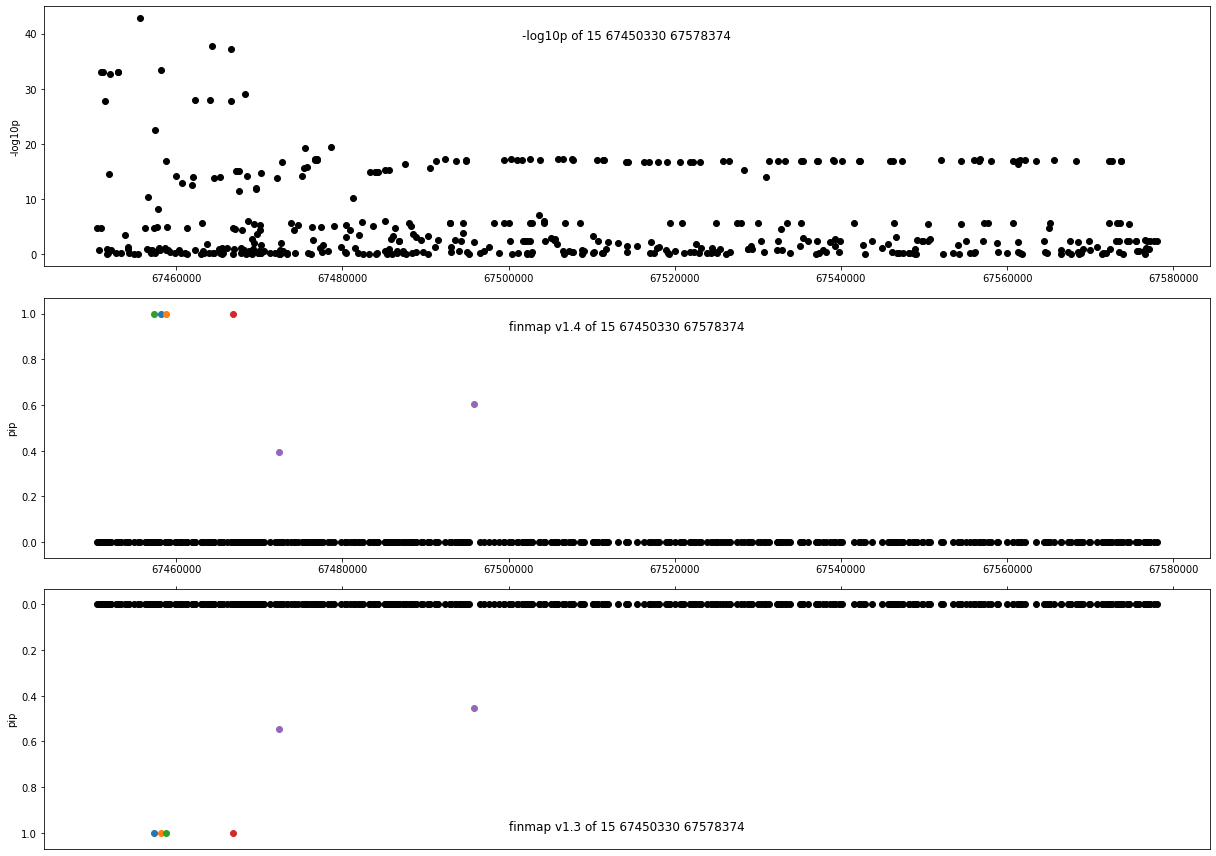

In [32]:
fig, axes = plt.subplots(nrows=3, figsize=(17, 12))

x = []
y = []
for snp_ind, pos in enumerate(rd["pos"]):
    x.append(pos)
    y.append(-np.log10(rd["p"][snp_ind]))
    
axes[0].scatter(x, y, color="black")
axes[0].set_title('-log10p of 15 67450330 67578374', x=0.5, y=0.85)

axes[1].scatter(normal_on_v14[0], normal_on_v14[1], color="black")
for key in v14_csets_on_v14.keys():
    axes[1].scatter(v14_csets_on_v14[key][0], v14_csets_on_v14[key][1], label=key)
axes[1].set_title('finmap v1.4 of 15 67450330 67578374', x=0.5, y=0.85)

axes[2].scatter(normal_on_v13[0], normal_on_v13[1], color="black")
for key in v13_csets_on_v13.keys():
    axes[2].scatter(v13_csets_on_v13[key][0], v13_csets_on_v13[key][1], label=key)
axes[2].set_title('finmap v1.3 of 15 67450330 67578374', x= 0.5, y=0.05)

axes[2].invert_yaxis()
axes[2].xaxis.tick_top()

axes[1].legend(loc="upper right")
axes[2].legend(loc="lower right")

axes[0].ticklabel_format(style='plain', axis='x')
axes[1].ticklabel_format(style='plain', axis='x')
axes[2].ticklabel_format(style='plain', axis='x')

axes[0].set_ylabel("-log10p")
axes[1].set_ylabel("pip")
axes[2].set_ylabel("pip")

axes[2].set_xticklabels(" ")

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()